In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [270]:
import os
os.getcwd()
os.chdir("/home/luciano/python/load_profiling/load_clustering")

In [271]:
os.getcwd()

'/home/luciano/python/load_profiling/load_clustering'

In [2]:
def dot(v,w):
    return sum([v_i*w_i for v_i,w_i in zip(v,w)])

In [3]:
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n""" 
    return dot(v,v)

In [4]:
def vector_subtract(v,w):
    """substracts corresponding elements"""
    return [v_i - w_i for v_i,w_i in zip(v,w)]

In [5]:
def squared_distance(v,w):
    """(v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(vector_subtract(v,w))

In [44]:
class Kmeans(k,input_data):
    """performs k-means clustering"""
    
    def __init__(self,k):
        self.k = k # number of clusters
        self.means = None # means of clusters
        
    def classify(self,input_data):
        """return the index of the cluster closest to the input"""
        return min(range(self.k),key = lambda i: squared_distance(input_data,self.means[i]))
    
    def train(self,inputs):
        # choose k random points as the initial means
        self.means = random.sample(inputs,self.k)
        assignments = None
        
        while True:
            # find new assignments
            new_assignments = map(self.classify, inputs)
        
            # Otherwise keep the new assignments,
            assignments = new_assignments
            
            # And compute new means based on the new assignments 
            for i in range(self.k):
            
            # find all the points assigned to cluster i
            i_points = [p for p, a in zip(inputs, assignments) if: a == i]
            
            # make sure i_points is not empty so don't divide by 0 
            if i_points: 
                self.means[i] = vector_mean(i_points)
   

IndentationError: expected an indented block (<ipython-input-44-aa4f53dccdb1>, line 28)

In [7]:
print(range(10))

range(0, 10)


In [8]:
import numpy
numpy.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

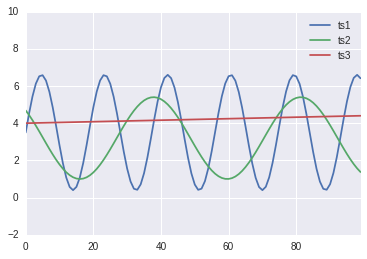

In [10]:
x = np.linspace(0,50,100)
ts1 = pd.Series(3.1*np.sin(x/1.5)+3.5)
ts2 = pd.Series(2.2*np.sin(x/3.5+2.4)+3.2)
ts3 = pd.Series(0.008*x+4)
%matplotlib inline
ts1.plot()
ts2.plot()
ts3.plot()
plt.legend(['ts1','ts2','ts3'])
plt.ylim(-2,10)
plt.show()

In [11]:
from math import sqrt
def euclid_dist(t1,t2):
    return sqrt(sum((t1-t2)**2))

In [12]:
print(euclid_dist(ts1,ts2))

26.959216037969345


In [13]:
print(euclid_dist(ts1,ts3))

22.74118384188875


In [14]:
%%latex 
ELECT dataid,use,local_15min 
FROM university.electricity_egauge_15min 
	WHERE dataid IN(
		SELECT DISTINCT dataid 
		FROM university.electricity_egauge_15min
		LIMIT 300
		)
		
	AND local_15min BETWEEN  '07-01-2015' AND '08-01-2015'

<IPython.core.display.Latex object>

In [15]:
import sqlite3

In [17]:
import pandas as pd

df = pd.DataFrame(data, columns=['id','date','energy_use'])

In [18]:
def count_empty_strings(data):
    empty = 0
    not_empty=0
    for row in data:
        if row == "":
            empty+=1
        else:
            not_empty+=1
    print("there are",str(round(empty/not_empty*100))+"%","missing values")

In [19]:
count_empty_strings(df.energy_use)

there are 2% missing values


In [20]:
df2 = df[df['energy_use']!=""]

In [21]:
count_empty_strings(df2.energy_use)

there are 0% missing values


In [22]:
count_empty_strings(df2.date)

there are 0% missing values


In [23]:
df2.loc[:,'energy_use'] = df2.energy_use.astype(float)

/home/luciano/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:545: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [24]:
df2.dtypes

id             object
date           object
energy_use    float64
dtype: object

In [25]:
df2.loc[:,'date'] = pd.to_datetime(df2.date)

/home/luciano/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [26]:
df2.dtypes

id                    object
date          datetime64[ns]
energy_use           float64
dtype: object

In [27]:
# create a column type of day contains info if row is weekday or weekend
df2['type_day'] = df2.date.apply(lambda x: x.isoweekday()) 
df2['day_of_month'] = df2.date.apply(lambda x: x.day) 

/home/luciano/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/luciano/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [28]:
df2.sort_values(['id', 'date'], ascending=[True, True],inplace=True)

/home/luciano/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
df3 = df2[(df2['type_day'] != 6) & (df2['type_day'] != 7)] # select only weekdays

In [30]:
df3.loc[:,'id'] = df3['id'].astype(int)

/home/luciano/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
houses = df3['id'].unique()
len(houses)

216

In [170]:
houses

array([ 101, 1086, 1103,  114,  115, 1169, 1185, 1192, 1202,  121, 1283,
        130, 1310, 1314, 1334, 1350, 1392, 1403, 1415, 1450, 1463, 1500,
       1507, 1508, 1524, 1577, 1586, 1589,  160, 1617, 1629, 1632, 1642,
       1681, 1696, 1697, 1700,  171, 1714, 1718, 1731, 1766, 1790, 1791,
       1792, 1800, 1801, 1830, 1832,  187, 1879, 1947, 1953, 2004, 2018,
        203, 2034, 2072, 2075, 2094, 2129, 2156, 2158, 2171, 2199, 2207,
        222, 2233, 2242,  232, 2335, 2337, 2361, 2365, 2378, 2401, 2449,
       2461, 2470, 2472,  252, 2532, 2557, 2575,   26, 2606, 2638, 2641,
       2667,  267, 2710, 2742,  275, 2751, 2755, 2769, 2787, 2814, 2818,
       2829, 2859, 2864, 2907, 2925, 2931, 2945, 2953, 2965,  297, 2980,
       2986, 2992, 3009, 3036, 3039, 3044, 3092, 3104, 3126, 3134, 3192,
       3221, 3224, 3268, 3273, 3299, 3310, 3367, 3368, 3392, 3394, 3401,
       3413, 3443, 3456, 3482, 3500, 3506, 3510, 3527, 3531, 3538, 3577,
       3631, 3635,  364, 3649, 3652, 3678, 3687,  3

In [266]:
import numpy as np
np.random.seed(1)

In [33]:
for i,item in enumerate(x):
    if len(item)==0:
        x = np.delete(x,i)
        

In [194]:
list_houses = np.empty((0, 96))

for i,house in enumerate(houses):
    """this explains what it does"""
    
    house_x= df3[df3['id'] == house]
    house_day = house_x[(house_x['day_of_month']==1) & (house_x['type_day']==3)]
    house_values = house_day.energy_use.values
    
    try:
        #print(list_houses.shape,house_values.shape)
        list_houses = np.append(list_houses,[house_values],axis=0)
    except ValueError:
        pass

In [195]:
list_houses.shape

(215, 96)

In [109]:
np.unique(list(map(len, x)))

array([ 0, 96])

In [169]:
for i,item in enumerate(x):
    if len(item)==0:
        x = np.delete(x,i)
        
    

In [126]:
np.unique(list(map(len, x)))

array([96])

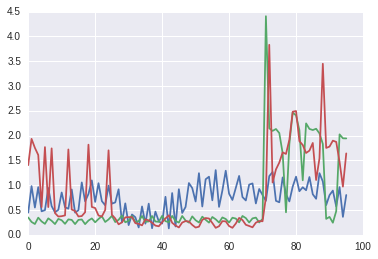

In [35]:
house_101 = df3[df3['id'] == 101]
house_101_day_1 = house_101[(house_101['day_of_month']==1) & (house_101['type_day']==3)]
house_994 = df3[df3['id'] == 994]
house_994_day_1 = house_994[(house_994['day_of_month']==1) & (house_994['type_day']==3)]
house_1350 = df3[df3['id'] == 1350]
house_1350_day_1 = house_1350[(house_1350['day_of_month']==1) & (house_1350['type_day']==3)]
plt.plot(house_101_day_1.energy_use.values)
plt.plot(house_994_day_1.energy_use.values)
plt.plot(house_1350_day_1.energy_use.values)
plt.show()

In [81]:
len(house_101)

2208

In [39]:
print(euclid_dist(house_101_day_1.energy_use.values,house_994_day_1.energy_use.values))

7.581366781201863


In [40]:
print(euclid_dist(house_101_day_1.energy_use.values,house_1350_day_1.energy_use.values))

7.5066133079808735


In [41]:
print(euclid_dist(house_994_day_1.energy_use.values,house_1350_day_1.energy_use.values))

7.389995453313891


In [45]:
from sklearn.cluster import KMeans

In [261]:
model = KMeans(n_clusters=5)

In [262]:
prediction = model.fit_predict(list_houses,cluster)

In [263]:
prediction

array([0, 3, 0, 3, 0, 0, 3, 0, 4, 3, 4, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 4,
       4, 3, 0, 0, 0, 0, 3, 3, 0, 4, 3, 4, 4, 3, 3, 3, 3, 0, 0, 4, 4, 3, 3,
       3, 3, 0, 1, 3, 3, 3, 3, 4, 0, 0, 1, 0, 4, 3, 3, 3, 3, 0, 0, 4, 3, 4,
       3, 1, 0, 3, 0, 0, 0, 0, 3, 0, 3, 4, 3, 3, 0, 3, 0, 1, 3, 0, 0, 1, 3,
       0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 4, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1,
       3, 1, 0, 2, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 4, 4, 0, 0, 0, 0, 3, 3,
       0, 3, 0, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 3, 3, 3, 3, 1, 3, 0, 3, 0, 0,
       0, 0, 4, 4, 0, 0, 3, 3, 0, 3, 0, 3, 1, 0, 0, 0, 1, 0, 4, 0, 3, 1, 0,
       0, 1, 0, 0, 0, 3, 3, 3, 4, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0,
       3, 3, 0, 0, 0, 0, 4, 0], dtype=int32)

In [264]:
count_list = []
for cluster in range(0,10):
    count = 0
    for x,y in zip(list_houses,prediction):
        if y == cluster:
            count += 1 
    count_list.append(count)
print(count_list)

[95, 13, 1, 84, 22, 0, 0, 0, 0, 0]


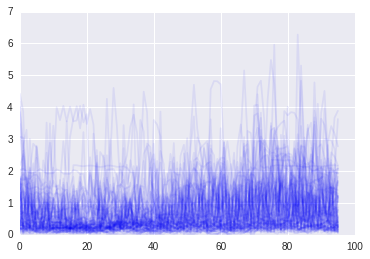

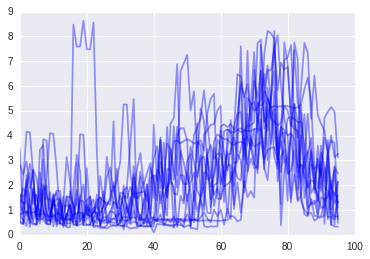

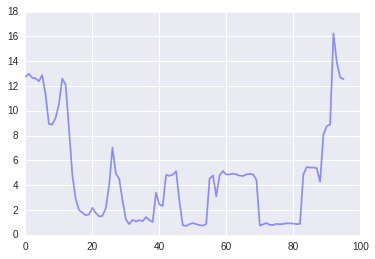

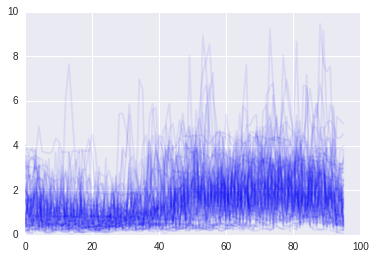

In [265]:
for x,y in zip(list_houses,prediction):
        if y == 0:
            plt.plot(x,alpha=0.07,color="blue")
plt.show()

for x,y in zip(list_houses,prediction):
        if y == 1:
            plt.plot(x,alpha=0.4,color="blue")
plt.show()

for x,y in zip(list_houses,prediction):
        if y == 2:
            plt.plot(x,alpha=0.4,color="blue")
plt.show()

for x,y in zip(list_houses,prediction):
        if y == 3:
            plt.plot(x,alpha=0.075,color="blue")
plt.show()
            
            

In [ ]:
for x,y in zip(list_houses,prediction):
        if y == 1:
            plt.plot(x)
plt.show()
            

In [52]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)
